#Quienes somos:


*   Maria Paula Aguilar
*   Diego Jimenez
*   Santiago Muñoz
*   Juan Sebastán
*   Christian

---
Origen de la data:
https://www.datos.gov.co/Seguridad-y-Defensa/Reporte-Delito-Violencia-Intrafamiliar-Polic-a-Nac/vuyt-mqpw




#P0. importar librerias (5%)

##P0.1 librerias genericas

In [2]:
#Librerias generales para administración de la data
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sb
from mpl_toolkits.mplot3d import Axes3D

#configuraciones basicas para PLT
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

##P0.2 librerias para Machine learning

In [3]:
#Librerias especializadas para hacer machine learning (k-means y/o otros)
from sklearn.cluster import KMeans
from sklearn import preprocessing  #para normalizar los datos antes de aplicar al algoritmo
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn import metrics

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#P1. importando dataset (5%)

In [5]:
df = pd.read_csv("/content/drive/MyDrive/Reporte_Delito_Violencia_Intrafamiliar_Polic_a_Nacional.csv")
df.head(5)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,CANTIDAD
0,ATLÁNTICO,BARRANQUILLA (CT),8001000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,MASCULINO,ADULTOS,1
1,BOYACÁ,DUITAMA,15238000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,1
2,CAQUETÁ,PUERTO RICO,18592000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,MASCULINO,ADULTOS,1
3,CASANARE,MANÍ,85139000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,1
4,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,1


#P2.Conociendo y normalizando los datos (30%)


###P2.0 generales (10%)

---
*   dimensiones del dataframe
*   existen columnas con nulos?
*   todos las columnas son númericos?
*   existen valores negativos?...si existen que hacemos con ellos?


In [6]:
df.shape
print(df.info())
print("____________describe____________\n",df.describe())
print("____________nulos?____________\n",df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519005 entries, 0 to 519004
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   DEPARTAMENTO  519005 non-null  object
 1   MUNICIPIO     519005 non-null  object
 2   CODIGO DANE   519005 non-null  object
 3   ARMAS MEDIOS  519005 non-null  object
 4   FECHA HECHO   519005 non-null  object
 5   GENERO        519005 non-null  object
 6   GRUPO ETARIO  517394 non-null  object
 7   CANTIDAD      519005 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 31.7+ MB
None
____________describe____________
             CANTIDAD
count  519005.000000
mean        1.738939
std         3.508878
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max       130.000000
____________nulos?____________
 DEPARTAMENTO       0
MUNICIPIO          0
CODIGO DANE        0
ARMAS MEDIOS       0
FECHA HECHO        0
GENERO             0
GRUPO ETARIO    1611
CA

#eliminar columna xxx ya que representa mas del 2% de los datos

In [7]:
df=df.drop(['GRUPO ETARIO'], axis=1)

##P2.1 Normalizando los datos (50%)

###P2.1.1 Convertir datos object (Categoricos o Text) en Data Numerica/DateTime

In [8]:
armas = {
    '-': 0,
    'ARMA BLANCA / CORTOPUNZANTE': 1,
    'ARMA DE FUEGO': 2,
    'CONTUNDENTES': 3,
    'CORTANTES':4,
    'CORTOPUNZANTES': 5,
    'ESCOPOLAMINA': 6,
    'NO REPORTA': 7,
    'NO REPORTADO': 8,
    'PUNZANTES': 9,
    'SIN EMPLEO DE ARMAS': 10
}
df['ARMAS MEDIOS'] = df['ARMAS MEDIOS'].map(armas)

In [9]:
GENERO = {
    '-': 0,
    'FEMENINO': 1,
    'MASCULINO': 2,
    'NO REPORTA': 3,
    'NO REPORTADO':4
    
}
df['GENERO'] = df['GENERO'].map(GENERO)

In [10]:
from sklearn import preprocessing
le =preprocessing.LabelEncoder()  #instanciamos el Codificador 

In [11]:
le.fit(df['MUNICIPIO'])  #codificamos las categorias
list(le.classes_)
df['MUNICIPIO']=le.fit_transform(df['MUNICIPIO'])  # (version rapida)

In [12]:
le.fit(df['DEPARTAMENTO'])  #codificamos las categorias
list(le.classes_)
df['DEPARTAMENTO']=le.fit_transform(df['DEPARTAMENTO'])  # (version rapida)

#ELIMINAR COLUMNAS

In [13]:
df=df.drop(['CODIGO DANE'], axis=1)

In [14]:
df=df.drop(['FECHA HECHO'], axis=1)

In [15]:
df.head()

,DEPARTAMENTO,MUNICIPIO,ARMAS MEDIOS,GENERO,CANTIDAD
0,3,83,1,2,1
1,5,256,1,1,1
2,7,668,1,2,1
3,8,497,1,1,1
4,12,99,1,1,1


In [16]:
df.shape
print(df.info())
print("____________describe____________\n",df.describe())
print("____________nulos?____________\n",df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519005 entries, 0 to 519004
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   DEPARTAMENTO  519005 non-null  int64
 1   MUNICIPIO     519005 non-null  int64
 2   ARMAS MEDIOS  519005 non-null  int64
 3   GENERO        519005 non-null  int64
 4   CANTIDAD      519005 non-null  int64
dtypes: int64(5)
memory usage: 19.8 MB
None
____________describe____________
         DEPARTAMENTO      MUNICIPIO   ARMAS MEDIOS         GENERO  \
count  519005.000000  519005.000000  519005.000000  519005.000000   
mean       14.844316     440.502558       5.411198       1.235183   
std         9.897091     304.239750       3.294493       0.426334   
min         0.000000       0.000000       0.000000       0.000000   
25%         5.000000     129.000000       3.000000       1.000000   
50%        12.000000     406.000000       3.000000       1.000000   
75%        25.000000     668.000000

###P2.1.2 normalizar todos los datos numericos entre [0, 1].

In [17]:
min_max_scaler = preprocessing.MinMaxScaler() 
df_escalado = min_max_scaler.fit_transform(df)
df_escalado = pd.DataFrame(df_escalado) # Hay que convertir a DF el resultado.
df_escalado = df_escalado.rename(columns = {0:'DEPARTAMENTO',1:'MUNICIPIO',2:'ARMAS MEDIOS',3:'GENERO',4: 'CANTIDAD'})

In [18]:
df_escalado.head()

,DEPARTAMENTO,MUNICIPIO,ARMAS MEDIOS,GENERO,CANTIDAD
0,0.09375,0.081293,0.1,0.50,0.0
1,0.15625,0.250735,0.1,0.25,0.0
2,0.21875,0.654261,0.1,0.50,0.0
3,0.25000,0.486778,0.1,0.25,0.0
4,0.37500,0.096964,0.1,0.25,0.0


###P2.1.3 exportando Data a un CSV con los arreglos (si son necesarios).

In [19]:
df.to_csv('VIOLENCIA.csv', index_label='row')

##P2.2 graficando datos (40%)

---

*   Gráficos circulares 
*   Gráfico de dispersión (k-means) 
*   Histogramas
*   uso de sabana de Graficas con seaborn
*   Gráfico de historico (matplotlib.legend)
*   matriz de correlación




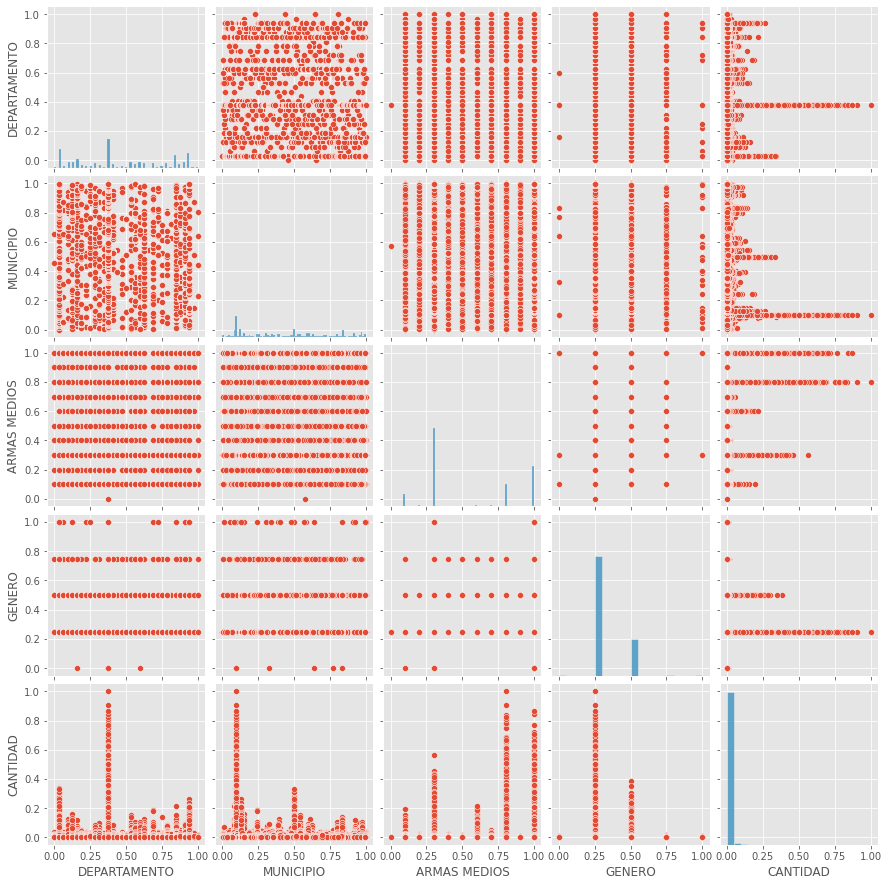

In [21]:
sb.pairplot(df_escalado);

In [22]:
print(df_escalado.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519005 entries, 0 to 519004
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   DEPARTAMENTO  519005 non-null  float64
 1   MUNICIPIO     519005 non-null  float64
 2   ARMAS MEDIOS  519005 non-null  float64
 3   GENERO        519005 non-null  float64
 4   CANTIDAD      519005 non-null  float64
dtypes: float64(5)
memory usage: 19.8 MB
None


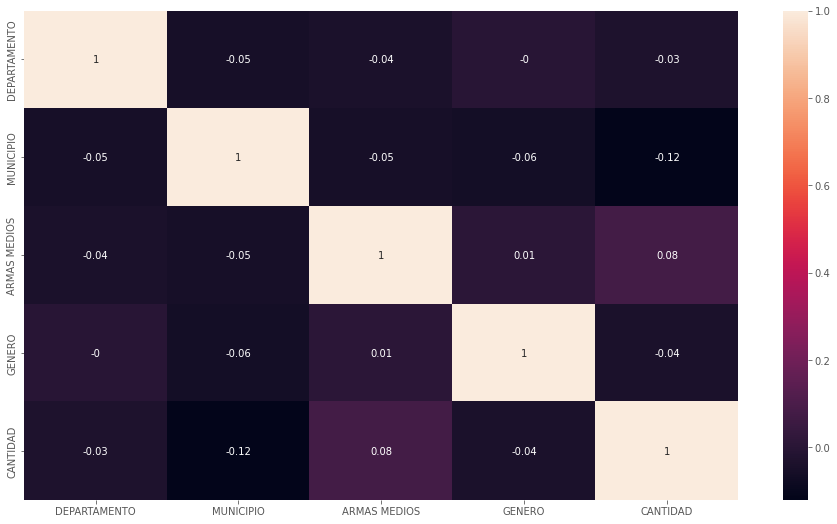

In [23]:
correlation_matrix = df_escalado.corr().round(2)
sb.heatmap(data=correlation_matrix, annot=True)

In [24]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import preprocessing  #para normalizar los datos antes de aplicar al algoritmo
from sklearn.metrics import pairwise_distances_argmin_min

import matplotlib.pyplot as plt
import seaborn as sb
from mpl_toolkits.mplot3d import Axes3D

#configuraciones basicas para PLT
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

#P3. Algoritmo de k-means (30%)

##P3.1 gráfica elbow o de codo (20%)

In [28]:
print("____________nulos?____________\n",df_escalado.isnull().sum())

____________nulos?____________
 DEPARTAMENTO    0
MUNICIPIO       0
ARMAS MEDIOS    0
GENERO          0
CANTIDAD        0
dtype: int64


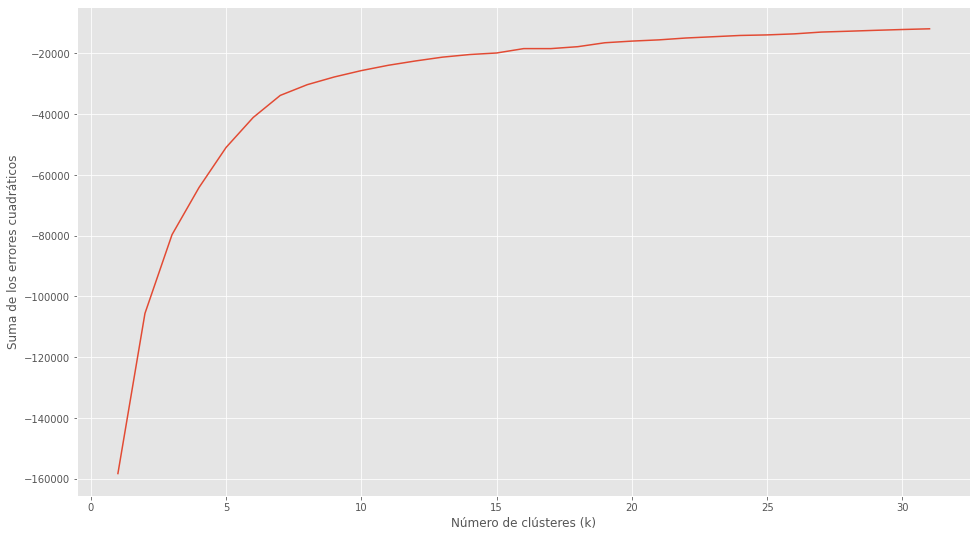

In [29]:

nc = range(1, 32) # El número de iteraciones que queremos hacer.
kmeans = [KMeans(n_clusters=i) for i in nc]
score = [kmeans[i].fit(df_escalado).score(df_escalado) for i in range(len(kmeans))]
score
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Suma de los errores cuadráticos')
plt.plot(nc,score)

##P3.2 buscando los centroides (30%)

In [33]:
#%% Aplicación de k-means con k = 7.
kmeans = KMeans(n_clusters=7).fit(df_escalado)
centroids = kmeans.cluster_centers_
print(centroids)

[[0.70199803 0.71857104 0.2843482  0.30234451 0.00275784]
 [0.19768879 0.17127581 0.26660215 0.31491861 0.00525072]
 [0.17725467 0.68537834 0.27664763 0.30326897 0.00323866]
 [0.28743258 0.73815279 0.93625801 0.30502519 0.00456263]
 [0.29167642 0.15397716 0.89579988 0.31923594 0.01513401]
 [0.82850925 0.21123464 0.27785321 0.30863767 0.0045066 ]
 [0.82507105 0.3766888  0.94032048 0.30693149 0.00328295]]


##P3.3 Etiquetado de datos. (20%)

In [36]:
#%% Etiquetamos nuestro dataframe.
labels = kmeans.predict(df_escalado)   #generamos las etiquetas de cada clouster
df_escalado['label'] = labels                   #añadimos la columna “label” a nuestro dataframe original


df_escalado.head(60)

,DEPARTAMENTO,MUNICIPIO,ARMAS MEDIOS,GENERO,CANTIDAD,label
0,0.09375,0.081293,0.1,0.50,0.000000,1
1,0.15625,0.250735,0.1,0.25,0.000000,1
2,0.21875,0.654261,0.1,0.50,0.000000,2
3,0.25000,0.486778,0.1,0.25,0.000000,2
4,0.37500,0.096964,0.1,0.25,0.000000,1
5,0.87500,0.831538,0.1,0.25,0.000000,0
6,0.93750,0.126347,0.1,0.25,0.007752,5
7,0.93750,0.126347,0.1,0.50,0.007752,5
8,0.93750,0.918707,0.1,0.25,0.000000,0
9,0.53125,0.617042,0.2,0.25,0.000000,0


##P3.4 Representación gráfica de los clústeres k-means.(20%)

---
Una vez con los datos etiquetados, generar gráficamente en dos dimensiones el clustering realizado por k-means, usar dos variables


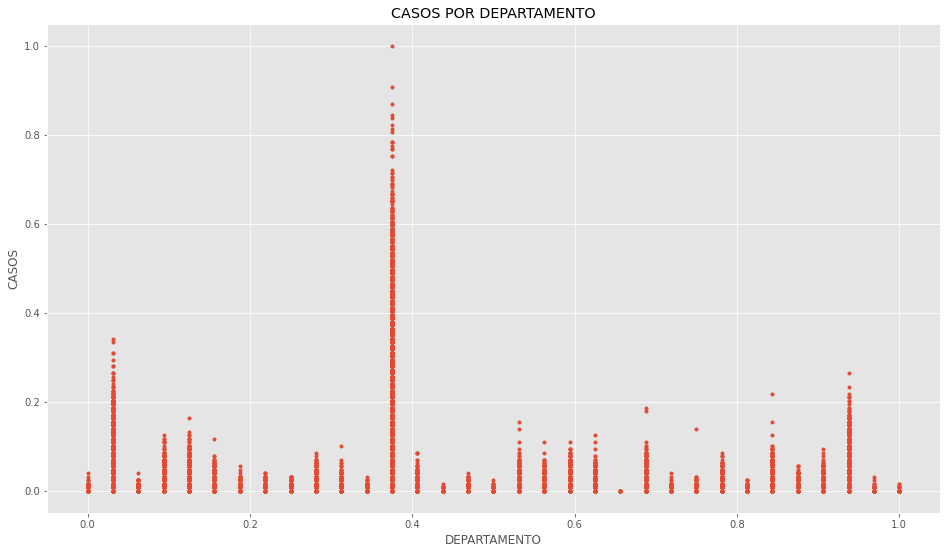

In [35]:
#%% Representación gráfica de los datos.
x = df_escalado['DEPARTAMENTO'].values
y = df_escalado['CANTIDAD'].values
plt.xlabel('DEPARTAMENTO')
plt.ylabel('CASOS')
plt.title('CASOS POR DEPARTAMENTO')
plt.plot(x,y,'o',markersize=3)

##P3.5 exportar el Dataset con los labels (10%)

In [37]:
df_escalado.to_csv('VIOLENCIA.csv', index_label='row')

#P4.algoritmo de machine Learning  (30%)

---

Seleccione un algoritmo (regresión lineal ó regresión logistica ó arboles de clasificación) que tenga la mejor inferencia

##P4.1 Preparación de los datos para el entrenamiento del modelo (10%)

##P4.2 Dividir los datos en conjuntos de entrenamiento (X %) y pruebas (X %) (30%)

##P4.3 Entrenando el modelo (20%)

##P4.4 Evaluación del modelo (40%)


##P4.5 la predicción es superior a 80%???